# Hydrologische Modelle - Übung 7

## Vorgehensweise

Sie befinden sich hier in einem Jupyter Notebook, auf welchem Sie Matlab-Code ausführen können. Bitte lesen Sie sich die folgenden Hinweise zur Nutzung dieses Notebooks gut durch.

* bitte schreiben Sie Ihren Code entsprechend der jeweiligen Übungsaufgabe in das Feld unter der Aufgabe
* Ihren Code führen Sie hier (in Jupyter Notebooks) durch die Tastenkombination Shift + Enter im jeweiligen Codeblock aus
* Die Lösung zur Aufgabe kann durch einen Klick auf die drei Punkte unter "Lösung:" eingesehen werden. Bitte werfen Sie erst einen Blick in die Lösungen, wenn Ihr Code entweder läuft oder sie alles probiert haben, was Ihnen als Lösungsweg einfällt (Sie verderben sich sonst selbst den ganzen Knobelspaß und das Erfolgserlebnis am Ende ;-) ). Oft hilft ein Blick in die PDF zur jeweiligen Übung oder auch Google.
* Code-Blöcke und ihr Output lassen sich in Jupyter Notebooks durch einen Klick auf den linken blauen Balken ausblenden.
* Oftmals gibt es nicht nur DEN einen Weg in Matlab (und anderen Programmiersprachen) - probieren Sie ruhig alles aus! Viel können Sie hier nicht kaputt machen. ;-)

In dem Sinne viel Spaß!

## Inhalte
* Einzellinearspeicher & Speicherkaskade: Implementation und Darstellung
* Einzellinearspeicher & Speicherkaskade: NA-Modellierung

## Einzellinearspeicher & Speicherkaskade: Implementation und Darstellung

#### 1. Schreiben Sie eine Funktion **els.m**, die den Auslauf aus einem Einzellinearspeicher anhand der Gleichung  
$Q(t)= \begin{cases}1-e^{-\frac{t}{K}} & \text { für } t \leq \Delta t \\ e^{\frac{\Delta t-t}{K}}-e^{-\frac{t}{K}} & \text { für } t>\Delta t\end{cases}$  
berechnet. Beachten Sie, dass $\Delta t $ die Länge des Niederschlags bezeichnet und nicht unbedingt dem Zeitschritt in t entsprechen muss.  

Die funktion **els** soll als Eingabe einen Vektor *t* für die Zeitpunkte des zu berechnenden Ausflusses, sowie die Skalare $\Delta t$ für die Länge des Zeitschrittes des Niederschlags und die Speicherkonstante *K* akzeptieren.

Lösung:

In [1]:
%%file els_loesung.m
%ELS    Einzellinearspeicher
%    Berechnet den Ausfluss aus einem Einzellinearspeicher.
%
%    Input:
%       t   Zeit (Array)
%       dt  Zeitschritt für Niederschlag / Input (Skalar)
%       K   Speicherkonstante
%
%    Output:
%       q   Ausfluss aus dem Speicher
%
%    Syntax:
%       q = els(t, dt, K)
function [q] = els_loesung(t, dt, K)
    Nt = numel(t);
    q = zeros(Nt, 1);
    for i=(1:Nt)
        if t(i)<= dt
            q(i) = (1 - exp(-t(i)/K));
        else
            q(i) = (exp((dt-t(i))/K) - exp(-t(i)/K));
        end
    end
end

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_7/els_loesung.m'.


#### 2. Stellen Sie für $t=(0: 0.05: 10)$ und die Speicherkonstanten $K=[0.5,1,2,3,5]$ die Ergebnisse in einer Abbildung dar. Legen sie die Länge des Niederschlagszeitschrittes $\Delta t$ auf einen sinnvollen Wert fest (z.B. $\Delta t = 1$).

Lösung: 

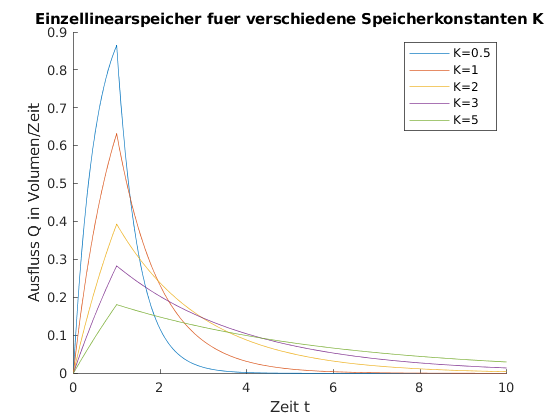

In [3]:
dt = 1;
t = (0:0.05:10);
K = [0.5, 1, 2, 3, 5];

figure(1)
clf()
hold all
for i = 1:numel(K)
    label = sprintf("K=%g", K(i));
    plot(t, els_loesung(t, dt, K(i)), "DisplayName", label)
end
ylabel("Ausfluss Q in Volumen/Zeit")
xlabel("Zeit t")
legend()
title("Einzellinearspeicher fuer verschiedene Speicherkonstanten K")

#### 3.  Schreiben Sie nun auch eine Funktion **lsk.m**, die den Auslauf aus einer linearen Speicherkaskade anhand der folgenden Gleichung berechnet.  
$Q(t)=P_{\mathrm{konst}} \cdot \frac{\Delta t}{K^{N} \cdot \Gamma(N)} \cdot t^{N-1} \cdot e^{-t / K}$  

Beachten Sie, dass $\Delta t$ wiederum die Länge des Niederschlags bezeichnet und nicht unbedingt dem Zeitschritt in *t* entsprechen muss.  
  
Die Funktion **lsk** soll als Eingabe einen Vektor *t* für die Zeitpunkte des zu beerechnenden Ausflusses, sowie die Skalare $\Delta t$ füür die Länge des Zeitschrittes des Niederschlags, die Speicherkonstante *K* und die Anzahl der Speicher *N* akzeptieren.  
  
In Matlab können Sie zur Berechnung der $\Gamma$-Funktion die Funktion **gamma(N)** verwenden. 

Lösung:

In [5]:
%%file lsk_loesung.m
%LSK    Linear Speicherkaskade
%    Berechnet den Ausfluss aus einer lineare Speicherkaskade.
%
%    Input:
%       t   Zeit (Array)
%       dt  Zeitschritt für Niederschlag / Input (Skalar)
%       K   Speicherkonstante
%       N   Zahl der Speicher
%
%    Output:
%       q   Ausfluss aus dem Speicher
%
%    Syntax:
%       q = lsk(t, dt, K, N)
function [q] = lsk_loesung(t, dt, K, N)
    t = t(:);
    q = dt/(K.^(N).*gamma(N)).*t.^(N-1).*exp(-t./K);
end

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_7/lsk_loesung.m'.


#### 4.  Stellen sie für $t=(0: 0.05: 10)$ die Ergebnisse in zwei Subplots dar. Einmal für die feste Zahl *N = 2* und die Speicherkonstanten $K=[0.5,1,2,3,5]$ sowie für festes *K = 1* und die Anzahl $N = (2: 6)$. Wählen Sie auch hier einen sinnvollen Wert für die Länge des Niederschlagzeitschrittes $\Delta t$  (z.B. $\Delta t$ = 1).

Lösung:

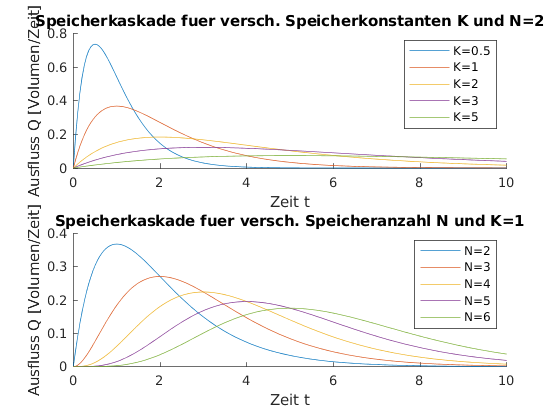

In [8]:
dt = 1;
t = (0:0.05:10);

% festes N, K variabel
N1 = 2;
K1 = [0.5, 1, 2, 3, 5];

% festes K, N variabel
N2 = (2:6);
K2 = 1;

figure(2)
clf()

subplot(211)
hold all
for i = 1:numel(K1)
    label = sprintf("K=%g", K(i));
    plot(t, lsk_loesung(t, dt, K1(i), N1), "DisplayName", label)
end
ylabel("Ausfluss Q [Volumen/Zeit]")
xlabel("Zeit t")
legend()
title("Speicherkaskade fuer versch. Speicherkonstanten K und N=2")

subplot(212)
hold all
for i = 1:numel(N2)
    label = sprintf("N=%g", N2(i));
    plot(t, lsk_loesung(t, dt, K2, N2(i)), "DisplayName", label)
end
ylabel("Ausfluss Q [Volumen/Zeit]")
xlabel("Zeit t")
legend()
title("Speicherkaskade fuer versch. Speicheranzahl N und K=1")

## Einzellinearspeicher & Speicherkaskade: NA-Modellierung

#### 1.  Mit Hilfe des Einheitsganglinienverfahrens soll eine Hochwasserwelle, die auf ein Starkregenereignis folgte, modelliert werden. Als Einheitsganglinie sollen einmal der Einzellinearspeicher und als zweites die Speicherkaskade dienen. Die Datei **els_lsk_fit_fillin.m** enthält bereits ein Grundgerüst für diese Aufgabe und wurde in die folgenden Code-Felder übernommen. 

Im Abschnitt %% Fit mit ... sind jeweils für beide Modelle noch folgende Schritte zu erledigen:  

a) Definition einer Zielfunktion für die Optimierung
* Die Zielfunktion soll als anonyme Funktion mit der Syntax $objf\_els =@($ par $)$  sse$(Q$, Pmat* $\ldots)$ definiert werden.
* *par* bezeichnet die zu optimierenden Parameter
* für die Speicherkaskade müssen *par(1)* und *par(2)* den entsprechenden Argumenten der Modellfunktion **lsk** zugeordnet werden.
* *Pmat * ...* ist die Multiplikation der Niederschlagsmatrix (*Pmat* wurde schon vorher definiert) mit dem Ergebnisvektor aus der Modellrechnung, d.h. der Aufruf von **els(t, dt, par)** für den Einzellinearspeicher oder **lsk(t, dt, par(1), par(2))** für die Speicherkaskade
* *sse* berechnet die Summe der Fehlerquadrate der beiden Eingabevektoren (siehe **sse.m** oder Musterbeleg)

b) Festlegung einer Startschätzung, *K = 1* und *N = 1* sind hier ausreihend
* für die Speicherkaskade müssen die beiden Startwerte in einen gemeinsamen Vektor geschrieben werden.

c) Optimierung der Modellparameter (*K* für den Einzellinearspeicher, *K* und *N* für die Speicherkaskade) mit der Matlabfunktion **fminsearch**
* der Aufruf von **fminsearch** erfolgt analog zu: $[\text { par_opt, res }]=\text { fminsearch (objf, par0); }$
* *objf* ist die Zielfunktion, par0 die Schätzung für die Startwerte der Parameter
* *par_opt* enthält nach erfolgreicher Optimierung die gefundenen Parameterwerte

d) Berechnung der Modellvorhersage mit den optimierten Parametern

In [13]:
%%file fill_mat.m
% Erstellt eine schrittweise diagonal versetzte P-Q-Matrix.
%
%    Input:
%       P   Niederschlagsvektor
%       Q   Durchflussvektor
%
%    Output:
%       Pmat   P-Q-Matrix
%
%    Syntax:
%       [Pmat] = fill_mat(P, Q)

function [Pmat] = fill_mat(P, Q)
    NumQ = numel(Q);
    NumP = numel(P);
    NumH = NumQ-NumP+1;
    Pmat = zeros(NumH, NumQ);
    for i = 1:NumH
        Pmat(i:i+NumP-1, i) = P;
    end
end

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_7/fill_mat.m'.


In [14]:
%% Daten einlesen
clear
baerenfels = importdata('Baerenfels.txt', '\t', 9);
Q = baerenfels.data(:, 6);
P = baerenfels.data(:, 7);

%% relevante Daten extrahieren
i1p = find(P>0, 1, 'first');
i2p = find(P>0, 1, 'last');
i1q = find(Q>0, 1, 'first');
i2q = find(Q>0, 1, 'last');
Q = Q(i1q:i2q);
P = P(i1p:i2p);
t_tmp = datetime([baerenfels.data(:, 1:5), zeros(size(baerenfels.data, 1), 1)]);
t_plot = t_tmp(i1q:i2q);
dt = 0.25; % 15 min = 0.25 h
t = (1:numel(Q))*dt;

%% Matrix fuer Einheitsganglinienverfahren erstellen
Pmat = fill_mat(P, Q);

In [11]:
%% Fit mit Einzellinearspeicher

% Zielfunktion definieren
%objf_els = @(par) sse(Q, Pmat*...);

% Startschaetzung fuer Parameter festlegen
%par0_els = ...;

% Optimierung mit fminsearch
%[par_opt_els, res_els] = fminsearch(..., ...);

% Berechnung der Modellvorhersage mit optimierten Parametern
%q_els = Pmat*els(..., ..., ...);

%% Fit mit linearer Speicherkaskade
% Zielfunktion definieren
%objf_lsk = @(par) sse(Q, Pmat*...);

% Startschaetzung fuer Parameter festlegen
%par0_lsk = ...;

% Optimierung mit fminsearch
%[par_opt_lsk, res_lsk] = fminsearch(..., ...);

% Zuweisen der Parameter in individuelle Variablen (optional)
%K_lsk = par_opt_lsk(...);
%N_lsk = par_opt_lsk(...);

% Berechnung der Modellvorhersage mit optimierten Parametern
%q_lsk = Pmat*lsk(..., ..., ..., ...);

In [ ]:
%% Darstellung
figure(1)
clf
plot(t_plot, Q)
hold all
plot(t_plot, q_els, "DisplayName", sprintf("Fit Einzellinearspeicher K=%f", par_opt_els))
plot(t_plot, q_lsk, "DisplayName", sprintf("Fit lineare Speicherkaskade K=%f N=%f", K_lsk, N_lsk))
xlabel("Datum in h")
ylabel("Durchfluss in m^3/s")
title("Hochwasserwelle Baerenfels/Poebelbach")
legend()


function [Pmat] = fill_mat(P, Q)
    NumQ = numel(Q);
    NumP = numel(P);
    NumH = NumQ-NumP+1;
    Pmat = zeros(NumH, NumQ);
    for i = 1:NumH
        Pmat(i:i+NumP-1, i) = P;
    end
end

Lösung:

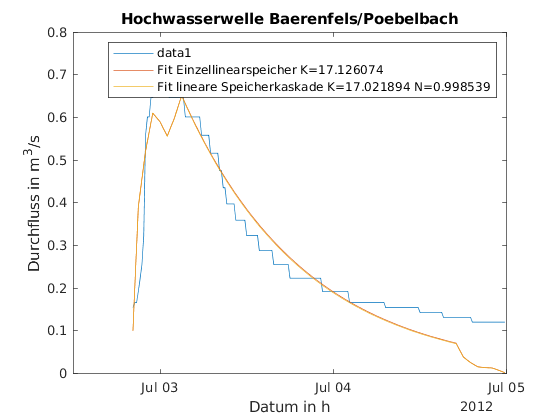

In [24]:
clear
%% Daten einlesen
baerenfels = importdata('Baerenfels.txt', '\t', 9);
Q = baerenfels.data(:, 6);
P = baerenfels.data(:, 7);

%% relevante Daten extrahieren
i1p = find(P>0, 1, 'first');
i2p = find(P>0, 1, 'last');
i1q = find(Q>0, 1, 'first');
i2q = find(Q>0, 1, 'last');
Q = Q(i1q:i2q);
P = P(i1p:i2p);
t_tmp = datetime([baerenfels.data(:, 1:5), zeros(size(baerenfels.data, 1), 1)]);
t_plot = t_tmp(i1q:i2q);
dt = 0.25; % 15 min = 0.25 h
t = (1:numel(Q))*dt;

%% Matrix fuer Einheitsganglinienverfahren erstellen
Pmat = fill_mat(P, Q);

%% Fit mit Einzellinearspeicher
objf_els = @(par) sse(Q, Pmat*els_loesung(t, dt, par));
par0_els = 1;
[par_opt_els, res_els] = fminsearch(objf_els, par0_els);
q_els = Pmat*els_loesung(t, dt, par_opt_els);

%% Fit mit linearer Speicherkaskade
objf_lsk = @(par) sse(Q, Pmat*lsk_loesung(t, dt, par(1), par(2)));
par0_lsk = [1; 1];
[par_opt_lsk, res_lsk] = fminsearch(objf_lsk, par0_lsk);
K_lsk = par_opt_lsk(1);
N_lsk = par_opt_lsk(2);

q_lsk = Pmat*lsk_loesung(t, dt, K_lsk, N_lsk);


%% Darstellung
figure(1)
clf
plot(t_plot, Q)
hold all
plot(t_plot, q_els, "DisplayName", sprintf("Fit Einzellinearspeicher K=%f", par_opt_els))
plot(t_plot, q_lsk, "DisplayName", sprintf("Fit lineare Speicherkaskade K=%f N=%f", K_lsk, N_lsk))
xlabel("Datum in h")
ylabel("Durchfluss in m^3/s")
title("Hochwasserwelle Baerenfels/Poebelbach")
legend()